## Squirrel Data - Central Park 2018
 Written Analysis at the end of the document.

## Analysis
From the sample it is evident that the squirrel

In [155]:
import pandas as pd 
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from iteration_utilities import duplicates

In [25]:
from math import pi
import bokeh
from collections import Counter

### Import the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\alonz\Documents\assorted_Jupyter_Personal_Projects\Datasets\2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")

In [4]:
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [8]:
df.index

RangeIndex(start=0, stop=3023, step=1)

In [9]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [13]:
df["Primary Fur Color"].unique()

array([nan, 'Gray', 'Cinnamon', 'Black'], dtype=object)

In [15]:
fur_color_pri = df["Primary Fur Color"].copy()

In [17]:
fur_color_pri = fur_color_pri.dropna()

In [19]:
fur_color_pri.unique()

array(['Gray', 'Cinnamon', 'Black'], dtype=object)

In [26]:
Counter(fur_color_pri)

Counter({'Gray': 2473, 'Cinnamon': 392, 'Black': 103})

In [62]:
#Boilplate Start 
import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in J notebook
import numpy as np
# init bokeh

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler


output_notebook()
#Boilplate End 

from math import pi

import pandas as pd

#from bokeh.palettes import Category20c
from bokeh.palettes import Bokeh
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

x = Counter(fur_color_pri)

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
#data['color'] = Category20c[len(x)]
data['color'] = Bokeh[len(x)]

p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None



show(p)

Loading BokehJS ...

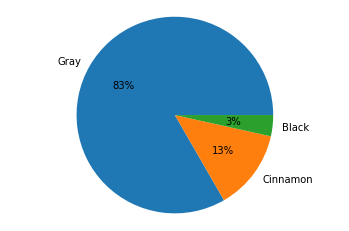

In [74]:
labels = []
sizes = [] 
dictionary = Counter(fur_color_pri)


for x,y in dictionary.items():
    labels.append(x)
    sizes.append(y)


plt.pie(sizes, labels = labels, autopct='%.0f%%')
plt.axis("equal")
plt.show()


### Secondary Fur Colors

In [41]:
second_fur_color = df.copy()["Highlight Fur Color"]

In [42]:
second_fur_color = second_fur_color.dropna()

In [44]:
second_fur_color.unique()

array(['Cinnamon', 'White', 'Gray', 'Cinnamon, White', 'Gray, White',
       'Black, Cinnamon, White', 'Black', 'Black, White',
       'Black, Cinnamon', 'Gray, Black'], dtype=object)

In [45]:
Counter(second_fur_color)

Counter({'Cinnamon': 767,
         'White': 585,
         'Gray': 170,
         'Cinnamon, White': 268,
         'Gray, White': 59,
         'Black, Cinnamon, White': 32,
         'Black': 34,
         'Black, White': 10,
         'Black, Cinnamon': 9,
         'Gray, Black': 3})

In [49]:
#Boilplate Start 
import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in J notebook
import numpy as np
# init bokeh

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler


output_notebook()
#Boilplate End 

from math import pi

import pandas as pd

from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

x = Counter(second_fur_color)

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]


p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None



show(p)

Loading BokehJS ...

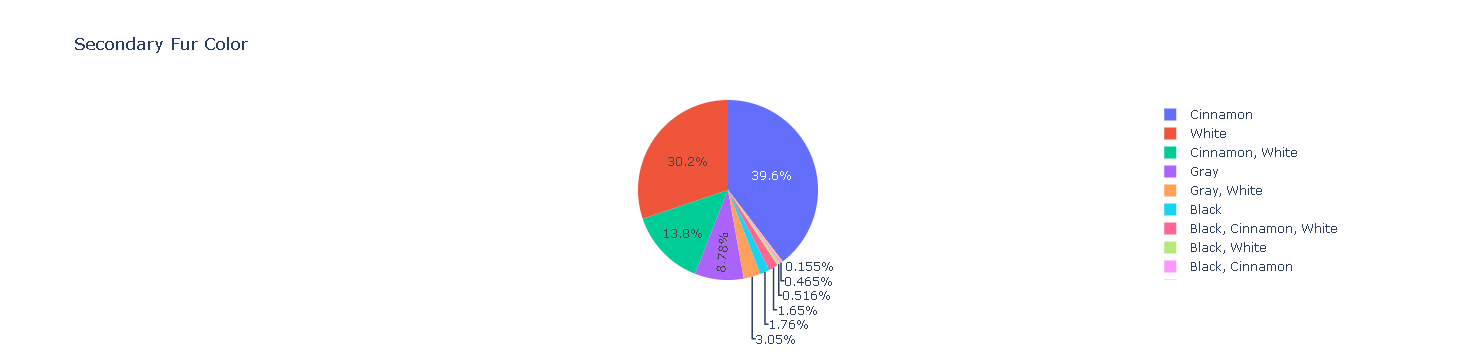

In [109]:
labels = []
sizes = [] 
dictionary = Counter(second_fur_color)


for x,y in dictionary.items():
    labels.append(x)
    sizes.append(y)    

fig = px.pie(values= sizes, names= labels, title = "Secondary Fur Color")
fig.show()

### Combination of Primary and Secondary

In [50]:
combo_fur = df.copy()["Combination of Primary and Highlight Color"]

In [51]:
combo_fur = combo_fur.dropna()

In [52]:
combo_fur.unique()

array(['+', 'Gray+', 'Gray+Cinnamon', 'Cinnamon+White', 'Gray+White',
       'Cinnamon+Gray', 'Gray+Cinnamon, White', 'Cinnamon+Gray, White',
       'Gray+Black, Cinnamon, White', 'Cinnamon+', 'Black+', 'Gray+Black',
       'Black+White', 'Black+Cinnamon', 'Gray+Black, White',
       'Cinnamon+Black', 'Black+Gray', 'Gray+Black, Cinnamon',
       'Black+Cinnamon, White', 'Cinnamon+Black, White',
       'Black+Gray, White', 'Cinnamon+Gray, Black'], dtype=object)

In [57]:
combo_fur.where(combo_fur == "+").count()

55

In [59]:
combo_fur.replace(to_replace = "+", value = "Unspecified", inplace = True)

In [60]:
combo_fur.where(combo_fur == "+").count()

0

In [110]:
Counter(combo_fur)

Counter({'Unspecified': 55,
         'Gray+': 895,
         'Gray+Cinnamon': 752,
         'Cinnamon+White': 94,
         'Gray+White': 489,
         'Cinnamon+Gray': 162,
         'Gray+Cinnamon, White': 265,
         'Cinnamon+Gray, White': 58,
         'Gray+Black, Cinnamon, White': 32,
         'Cinnamon+': 62,
         'Black+': 74,
         'Gray+Black': 24,
         'Black+White': 2,
         'Black+Cinnamon': 15,
         'Gray+Black, White': 7,
         'Cinnamon+Black': 10,
         'Black+Gray': 8,
         'Gray+Black, Cinnamon': 9,
         'Black+Cinnamon, White': 3,
         'Cinnamon+Black, White': 3,
         'Black+Gray, White': 1,
         'Cinnamon+Gray, Black': 3})

In [111]:
combo_dict = Counter(combo_fur)

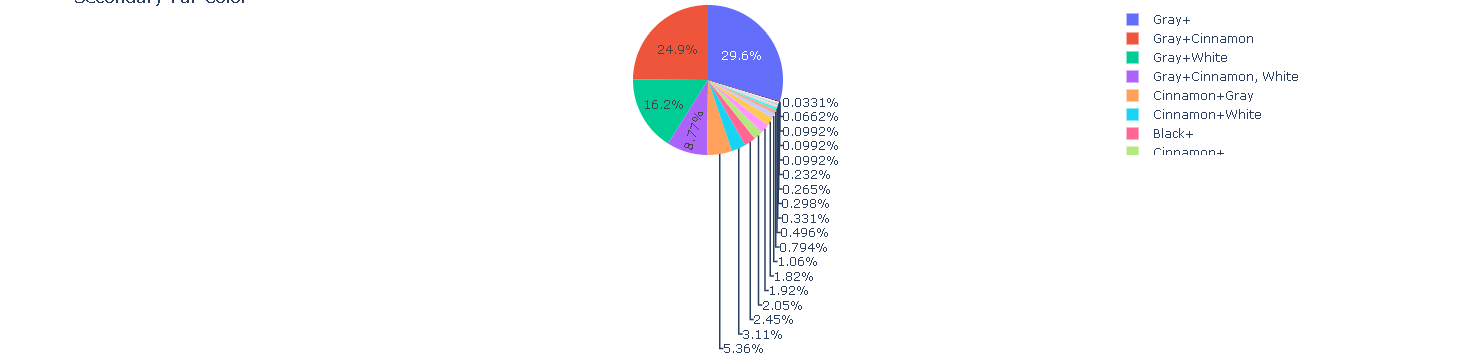

In [115]:
labels = []
sizes = [] 
dictionary =  Counter(combo_fur)


for x,y in dictionary.items():
    labels.append(x)
    sizes.append(y)    

fig = px.pie(values= sizes, names= labels, title = "Secondary Fur Color", width = 15)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0)) # Makes the chart bigger. 
fig.show()

## Age Group of the Squirrels

In [117]:
age = df["Age"].copy()

In [118]:
age.dropna(inplace = True)

In [119]:
age.nunique()

3

In [120]:
age.unique()

array(['Adult', 'Juvenile', '?'], dtype=object)

In [122]:
age.where(age == "?").count()

4

In [123]:
age.replace(to_replace = "?", value = "Unknown", inplace = True)

In [124]:
age.where(age == "?").count()

0

In [125]:
Counter(age)

Counter({'Adult': 2568, 'Juvenile': 330, 'Unknown': 4})

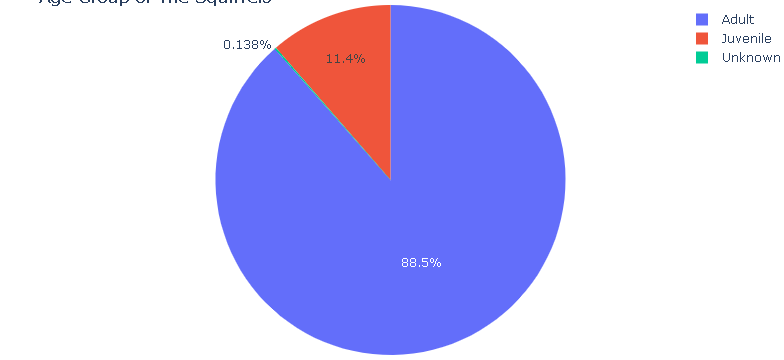

In [126]:
labels = []
sizes = [] 
dictionary =  Counter(age)


for x,y in dictionary.items():
    labels.append(x)
    sizes.append(y)    

fig = px.pie(values= sizes, names= labels, title = "Age Group of The Squirrels", width = 15)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0)) # Makes the chart bigger. 
fig.show()

## Mapping 
Central park general.

In [148]:
# Lattitude then longitude
cp = folium.Map(location=[40.781832, -73.966714], zoom_start = 14)

In [149]:
cp

In [151]:
df["Unique Squirrel ID"].count()

3023

In [152]:
df["Unique Squirrel ID"].nunique()

3018

In [156]:
from iteration_utilities import duplicates

In [160]:
list(df["Unique Squirrel ID"])[0]

'37F-PM-1014-03'

In [163]:
repeats = list(duplicates(df["Unique Squirrel ID"]))

##### Squirrels who showed up more than once.

In [164]:
repeats

['40B-AM-1019-06',
 '7D-PM-1010-01',
 '37E-PM-1006-03',
 '1F-AM-1010-04',
 '4C-PM-1010-05']

#### Get Coordinate Points From Data 

In [247]:
location = []

for animal in range(len(df) - 1):
    lat = df.iloc[animal]["X"] 
    long = df.iloc[animal]["Y"]
    
    tup = [lat, long]
    
    location.append(tup)


In [248]:
location[0:2]

[[-73.9561344937861, 40.7940823884086], [-73.9688574691102, 40.7837825208444]]

In [249]:
type(location[0][0])

numpy.float64

In [255]:
cp2 = cp

In [299]:
mapit = cp2
for point in range(len(location) -1):
    folium.Marker(location = [location[point][0], location[point][1] ],  fill_color='#43d9de', radius=8, popup= "<i>Animal</i>").add_to(cp2)

In [270]:
df[["X","Y"]]

,X,Y
0,-73.956134,40.794082
1,-73.968857,40.783783
2,-73.974281,40.775534
3,-73.959641,40.790313
4,-73.970268,40.776213
...,...,...
3018,-73.963943,40.790868
3019,-73.970402,40.782560
3020,-73.966587,40.783678
3021,-73.963994,40.789915


In [300]:
sq_list = df[["Y","X"]].values.tolist()

In [301]:
sq_list[0]

[40.7940823884086, -73.9561344937861]

In [302]:
sq_list_size = len(sq_list)

In [303]:
sq_list_size

3023

In [328]:
cp2 = folium.Map(location=[40.781832, -73.966714],  zoom_start = 14)

### Preview Map 
Only a few entries are being shown here, due to:

1. Massive slowdowns due to 3,000+ datapoints 
2. Overcrowding

Below shows the first 23 datapoints for demonstration.

In [329]:
for point in range(0, sq_list_size - 3000):
    folium.Marker(sq_list[point]).add_to(cp2)

In [330]:
cp2

In [321]:
from folium.plugins import MarkerCluster

In [322]:
cp3 = folium.Map(location=[40.781832, -73.966714],  zoom_start = 14)

In [325]:
marker_cluster = folium.plugins.MarkerCluster().add_to(cp3)

In [326]:
for point in range(0, sq_list_size):
    folium.Marker(sq_list[point]).add_to(cp3).add_to(marker_cluster)

In [327]:
cp3

In [349]:
cp4 = folium.Map(location=[40.781832, -73.966714], tiles="Stamen Terrain",  zoom_start = 14)

In [350]:
marker_cluster4 = folium.plugins.MarkerCluster().add_to(cp4)

for point in range(0, sq_list_size):
    folium.Marker(sq_list[point]).add_to(cp4).add_to(marker_cluster4)

In [351]:
cp4

## Heatmaps Maps

In [354]:
import folium
from folium.plugins import HeatMap

In [355]:
cp5 = folium.Map(location=[40.781832, -73.966714], tiles="Stamen Toner",  zoom_start = 14)

In [359]:
HeatMap(sq_list).add_to(cp5)

In [360]:
cp5

In [361]:
cp6 = folium.Map(location=[40.781832, -73.966714], tiles="Stamen Terrain",  zoom_start = 14)

In [362]:
HeatMap(sq_list).add_to(cp6)

In [363]:
cp6

## Sightings Time Series

In [365]:
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [383]:
df.loc[df["Shift"] == "AM"].X.count()

1347

In [382]:
df.loc[df["Shift"] == "PM"].X.count()

1676

In [389]:
df2["Date"]

0      1970-01-01 00:00:00.010142018
1      1970-01-01 00:00:00.010192018
2      1970-01-01 00:00:00.010142018
3      1970-01-01 00:00:00.010172018
4      1970-01-01 00:00:00.010172018
                    ...             
3018   1970-01-01 00:00:00.010072018
3019   1970-01-01 00:00:00.010132018
3020   1970-01-01 00:00:00.010122018
3021   1970-01-01 00:00:00.010102018
3022   1970-01-01 00:00:00.010122018
Name: Date, Length: 3023, dtype: datetime64[ns]

In [393]:
1676 + 1347 

3023

In [394]:
1676 / 3023

0.5544161429043996

## Written Analysis
Based on the sample, it is evident that the squirrel population is likely aging. 88% of the squirrels are adults, leaving only 12% of the population as juveniles ignoring the negligible number of animals of unknown age. The sample contains over 3,000 entries, that were collected over a two-week period from October 6th, 2018, until October 20th, 2018. There were only five squirrels that were sampled multiple times, during the duration of the study. Fifty-five percent of the data was collected in the daytime, while 45% of the data was collected during the evening. 

The squirrels vary phenotypically. A vast majority of the squirrels are primarily gray. The secondary colors of the squirrels vary more dramatically. This may suggest that the squirrels are different species or vary in color for some other unspecified reasons. 

The maps were the most elucidating aspect of this project. The breadths (width) of the rectangular park have the most squirrel activity overall. Central Park South is teeming with life, commerce, and human traffic. In addition to these, locals, and tourists alike, patronize food trucks at the border of the park. Additionally, there is a large mall and several restaurants where people will bring food and eat near the border of the park. It is not uncommon for people to drop food intentionally and unintentionally dropped by people on their leisurely stroll. There is even more activity in this area of the park near Central Park North. This is somewhat surprising considering Central Park North has considerably fewer things to do and is less remarkable. However, the heatmap reveals that Columbus’s circle is busier than any other frontier along the width.
The whole park is filled with unique squirrel sightings. This helps show that park is a vital biome to the city. However, there is some considerable activity near certain bodies of water, especially “The Lake”. Certain areas of the park are devoid of squirrel activity such as the playground, which shows that squirrels still respect certain spaces that humans frequent. 

Unfortunately, the activity facet of the squirrels of central park is somewhat limited. Most of the behavior’s researchers looked for within their ethogram were false, in the true/false section. It would have been immensely difficult for researchers to write down their other observations after already noting some other information. To get a better grasp of animal behavior, fewer squirrels would have to be observed to describe them in more vivid detail. 

Much of this information comes from the writer/analyst repertoire. He took a course in animal behavior and interned in New York City. He has also spent many hours walking through the park.


By: Alonzo Roberts